<a href="https://colab.research.google.com/github/11arjun11/CodeAlpha_Credit-Scoring-Model_/blob/main/credit_score_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Libraries**

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression

**Load the Dataset**

In [3]:
df = pd.read_excel('/content/Dataset_CreditScoring.xlsx')

**Data preparation**

In [4]:
# shows count of rows and columns
df.shape

(3000, 30)

In [5]:
#shows first few rows of the code
df.head()

,TARGET,ID,DerogCnt,CollectCnt,BanruptcyInd,InqCnt06,InqTimeLast,InqFinanceCnt24,TLTimeFirst,TLTimeLast,...,TL50UtilCnt,TLBalHCPct,TLSatPct,TLDel3060Cnt24,TLDel90Cnt24,TLDel60CntAll,TLOpenPct,TLBadDerogCnt,TLDel60Cnt24,TLOpen24Pct
0,1,582,3,3,0,4,0.0,5,117,27,...,3.0,0.9179,0.2083,2,3,7,0.2083,4,4,0.0000
1,1,662,15,9,0,3,1.0,3,14,14,...,1.0,0.8000,0.0000,0,0,0,1.0000,12,0,1.0000
2,1,805,0,0,0,1,5.0,1,354,7,...,5.0,0.3552,0.6538,0,1,1,0.7308,1,1,0.5263
3,1,1175,8,5,0,6,1.0,10,16,4,...,3.0,0.9127,0.2500,1,1,1,0.7500,7,1,1.3333
4,1,1373,3,1,0,9,0.0,8,130,52,...,1.0,1.2511,0.0000,0,1,4,0.1429,3,1,0.0000


In [6]:
# explore missing value
print(df.isnull().sum())


TARGET               0
ID                   0
DerogCnt             0
CollectCnt           0
BanruptcyInd         0
InqCnt06             0
InqTimeLast        188
InqFinanceCnt24      0
TLTimeFirst          0
TLTimeLast           0
TLCnt03              0
TLCnt12              0
TLCnt24              0
TLCnt                3
TLSum               40
TLMaxSum            40
TLSatCnt             4
TLDel60Cnt           0
TLBadCnt24           0
TL75UtilCnt         99
TL50UtilCnt         99
TLBalHCPct          41
TLSatPct             4
TLDel3060Cnt24       0
TLDel90Cnt24         0
TLDel60CntAll        0
TLOpenPct            3
TLBadDerogCnt        0
TLDel60Cnt24         0
TLOpen24Pct          3
dtype: int64


In [7]:
#dropping customer ID column from the dataset
df=df.drop('ID',axis=1)
df.shape

(3000, 29)

In [8]:
# filling missing values with mean
df=df.fillna(df.mean())


In [9]:
# explore missing values post missing value fix
df.isna().sum()


,0
TARGET,0
DerogCnt,0
CollectCnt,0
BanruptcyInd,0
InqCnt06,0
InqTimeLast,0
InqFinanceCnt24,0
TLTimeFirst,0
TLTimeLast,0
TLCnt03,0


In [10]:
# # count of good loans (0) and bad loans (1)
df['TARGET'].value_counts()

,count
TARGET,
0,2500
1,500


In [11]:
# # data summary across 0 & 1
df.groupby('TARGET').mean()

,DerogCnt,CollectCnt,BanruptcyInd,InqCnt06,InqTimeLast,InqFinanceCnt24,TLTimeFirst,TLTimeLast,TLCnt03,TLCnt12,...,TL50UtilCnt,TLBalHCPct,TLSatPct,TLDel3060Cnt24,TLDel90Cnt24,TLDel60CntAll,TLOpenPct,TLBadDerogCnt,TLDel60Cnt24,TLOpen24Pct
TARGET,,,,,,,,,,,,,,,,,,,,,
0,1.3224,0.7664,0.1492,2.9424,3.174638,3.2896,173.002,11.650,0.2844,1.832,...,3.986711,0.628177,0.544963,0.6044,0.6624,2.2236,0.502376,1.180,0.8648,0.556867
1,1.9680,1.3100,0.1740,3.9380,2.775459,4.8820,155.672,12.992,0.2280,1.768,...,4.533870,0.748185,0.385173,1.3340,1.5760,4.0140,0.465127,2.554,2.0860,0.600978


**Train Test Split**

In [12]:
y = df.iloc[:, 0].values
X = df.iloc[:, 1:29].values

In [13]:
 #splitting dataset into training and test (in ratio 80:20)

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=0,
                                                    stratify=y)

In [14]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [15]:
# Exporting Normalisation Coefficients for later use in prediction
import joblib
joblib.dump(sc, '/content/Dataset_CreditScoring.xlsx')

['/content/Dataset_CreditScoring.xlsx']

**Risk Model Building**

In [16]:
classifier =  LogisticRegression()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [17]:
# Exporting Logistic Regression Classifier for later use in prediction

# import joblib
joblib.dump(classifier, '/content/Dataset_CreditScoring.xlsx')

['/content/Dataset_CreditScoring.xlsx']

**Model Performance**

In [18]:
print(confusion_matrix(y_test,y_pred))

[[487  13]
 [ 87  13]]


In [19]:
print(accuracy_score(y_test, y_pred))


0.8333333333333334


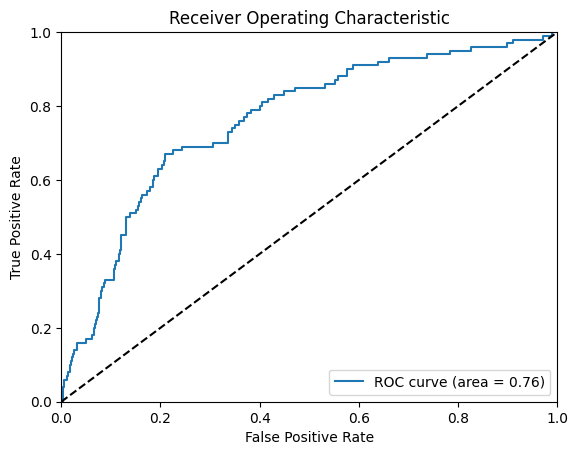

ROC AUC Score: 0.76114


In [26]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

y_prob = model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob)

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

print("ROC AUC Score:", roc_auc)


**Writing output file**

In [20]:
predictions = classifier.predict_proba(X_test)
predictions

array([[0.61644691, 0.38355309],
       [0.9885656 , 0.0114344 ],
       [0.87069686, 0.12930314],
       ...,
       [0.94450568, 0.05549432],
       [0.46756903, 0.53243097],
       [0.94014209, 0.05985791]])

In [21]:
# writing model output file

df_prediction_prob = pd.DataFrame(predictions, columns = ['prob_0', 'prob_1'])
df_prediction_target = pd.DataFrame(classifier.predict(X_test), columns = ['predicted_TARGET'])
df_test_dataset = pd.DataFrame(y_test,columns= ['Actual Outcome'])

dfx=pd.concat([df_test_dataset, df_prediction_prob, df_prediction_target], axis=1)

dfx.to_csv("/content/Dataset_CreditScoring.xlsx", sep=',', encoding='UTF-8')

dfx.head()

,Actual Outcome,prob_0,prob_1,predicted_TARGET
0,1,0.616447,0.383553,0
1,0,0.988566,0.011434,0
2,1,0.870697,0.129303,0
3,0,0.953963,0.046037,0
4,1,0.726633,0.273367,0


In [22]:
class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.97      0.91       500
           1       0.50      0.13      0.21       100

    accuracy                           0.83       600
   macro avg       0.67      0.55      0.56       600
weighted avg       0.79      0.83      0.79       600

